# Insurance Claim Model


© Explore AI

# By Ogunmola Philip



### Project Description

The aim of this project is to predict the total claim amount per exposure, for specific risk profiles. A risk profile describes a policyholder (someone who is a client and owns a policy at the insurer), things like age, gender, marital status, etc. These attributes can all be found in the dataset used in this project. The reason for doing this is so that the predicted claim can be used to calculate a premium for new applicants, based on their predicted risk. This way the insurer maximizes profits by charging higher premiums for higher risk profiles. It is important to consider however that accompanying a higher premium, the insurer should maintain sensibility in deciding on a premium and still outcompete competitor insurers, which make business rules essential. 


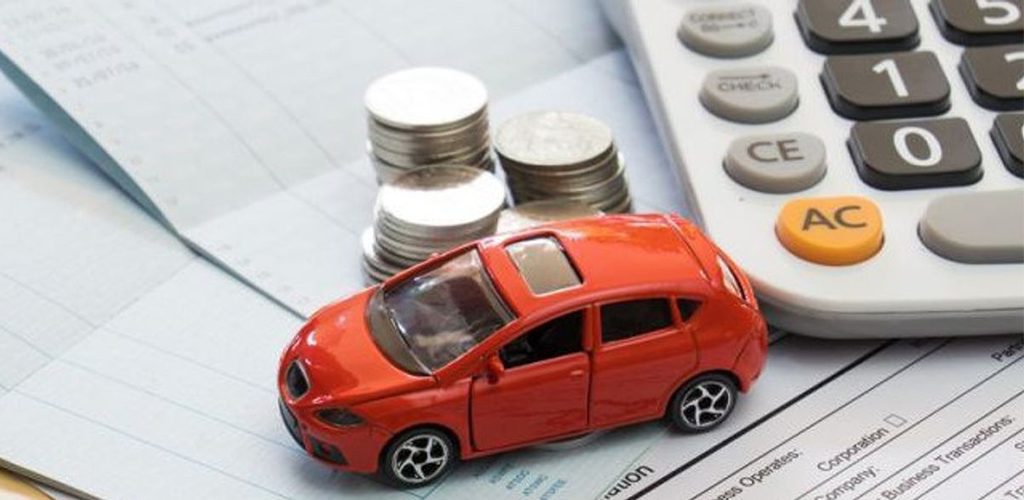

# Outline
This challenge is structured as follows:

- Loading Data
- Data Preprocessing
- Expolatory Data Analysis
- Features Engineering
- Modelling and Hyperparameter tuning.

# Importing Packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # for linear algebra
import pandas as pd # data processing, excel file importation

import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr
import seaborn as sns
from datetime import datetime
from time import time
%matplotlib inline

# Loading Data

In [2]:
# Read the dataset
df = pd.read_excel('DataSet.xlsx')

In [3]:
# Display entire columns of the dataset
pd.set_option("display.max.columns", None) 

In [4]:
# Display the dataset
df.head()

,PolicyId,ClaimId,SumTotalClaimAmount,CountTotalClaimAmount,PremiumSum,CasePremiumSum,PaymentDueDate,TotalPremiumPaymentCount,PreviousInsurerExcess,PreviousInsurerPremium,EmploymentType,IsMemberPayer,Employer,Occupation,IndustryType,Gender,BirthDt,MaritalStatus,Make,Model,Colour,Transmission,VehicleType,BodyType,CubicCapacity,Cyl,Kilowatts,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,MonthsSinceInception,DaysSinceInception,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,0.5865768182345752
0,10806273,NaN,NaN,NaN,4915.98,4369.76,2021-12-29,8.0,0.0,0.0,Permanent,1,NaN,Human Resource Consultant,Office / Clerical / Manager,Female,1966-11-22,Single,VOLKSWAGEN,POLO 1.4,grey,M,Auto,H/B,1390.0,4.0,62.0,2005.0,<5000 km,15+ years,KWAZULU-NATAL,Dolphin Coast,23.0,723.0,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,0.376611
1,10822247,NaN,NaN,NaN,3342.60,668.52,2020-09-30,1.0,4500.0,900.0,Permanent,1,NaN,Sale Rep,Government,Male,1992-08-31,Single,VOLKSWAGEN,POLO VIVO GP 1.4 CONCEPTLINE 5DR,silver,M,Auto,H/B,1398.0,4.0,55.0,2015.0,15000+ km,6 to 11 years,GAUTENG,PRETORIA,5.0,151.0,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,0.788738
2,10941976,NaN,NaN,NaN,1762.54,1762.54,2022-07-28,3.0,0.0,808.0,Permanent,1,NaN,Safety Officer,Office / Clerical / Manager,Female,1989-08-14,Single,VOLKSWAGEN,POLO VIVO 1.4 5Dr,white,M,Auto,H/B,1398.0,4.0,55.0,2014.0,5000 to 9999 km,6 to 11 years,MPUMALANGA,PRETORIA,NaN,NaN,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,0.375597
3,10782539,NaN,NaN,NaN,3723.60,3723.60,2021-08-31,5.0,0.0,0.0,Temporary / Casual,1,NaN,Cic support engineer,Other,Female,1991-02-17,Single,KIA,RIO 1.2 5DR,white,M,Auto,H/B,1248.0,4.0,62.0,2017.0,15000+ km,1 to 6 years,GAUTENG,NOORDWYK,26.0,800.0,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,0.773472
4,10916477,NaN,NaN,NaN,2478.72,0.00,2022-03-31,0.0,0.0,0.0,Permanent,1,NaN,Correctional Officer,Government,Male,1976-01-23,Single,BMW,320i M SPORT (F30),blue,M,Auto,S/D,1998.0,4.0,135.0,2015.0,<5000 km,15+ years,EASTERN CAPE,NaN,3.0,96.0,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,0.278507


**Observations:**
* The dataset contains a lot of columns
* The there are lots of Null values in the dataset 

In [5]:
df.columns # Outline the columns

Index([                            'PolicyId',
                                   'ClaimId ',
                        'SumTotalClaimAmount',
                      'CountTotalClaimAmount',
                                 'PremiumSum',
                             'CasePremiumSum',
                             'PaymentDueDate',
                   'TotalPremiumPaymentCount',
                      'PreviousInsurerExcess',
                     'PreviousInsurerPremium',
                             'EmploymentType',
                              'IsMemberPayer',
                                   'Employer',
                                 'Occupation',
                               'IndustryType',
                                     'Gender',
                                    'BirthDt',
                              'MaritalStatus',
                                       'Make',
                                      'Model',
                                     'Colour',
             

In [6]:
df.shape

(262990, 45)

**Observations:**
* 45 Columns
* 262990 Rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262990 entries, 0 to 262989
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   PolicyId                              262990 non-null  int64         
 1   ClaimId                               27478 non-null   float64       
 2   SumTotalClaimAmount                   27392 non-null   float64       
 3   CountTotalClaimAmount                 27478 non-null   float64       
 4   PremiumSum                            262750 non-null  float64       
 5   CasePremiumSum                        262750 non-null  float64       
 6   PaymentDueDate                        262750 non-null  datetime64[ns]
 7   TotalPremiumPaymentCount              262750 non-null  float64       
 8   PreviousInsurerExcess                 262963 non-null  float64       
 9   PreviousInsurerPremium                262961 non-null  floa

In [8]:
df.isnull().sum()

PolicyId                                     0
ClaimId                                 235512
SumTotalClaimAmount                     235598
CountTotalClaimAmount                   235512
PremiumSum                                 240
CasePremiumSum                             240
PaymentDueDate                             240
TotalPremiumPaymentCount                   240
PreviousInsurerExcess                       27
PreviousInsurerPremium                      29
EmploymentType                            2656
IsMemberPayer                                0
Employer                                255704
Occupation                                2246
IndustryType                              4131
Gender                                       8
BirthDt                                      6
MaritalStatus                                6
Make                                         6
Model                                        6
Colour                                       6
Transmission 

**Observations:**
* Lots of null entries in some columns, this might require us to drop some columns

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyId,262990.0,1.084961e+07,51720.661654,1.076784e+07,1.080422e+07,1.084769e+07,1.089272e+07,1.095790e+07
ClaimId,27478.0,1.010507e+07,15069.963591,1.007378e+07,1.009240e+07,1.010566e+07,1.011831e+07,1.012987e+07
SumTotalClaimAmount,27392.0,4.059307e+04,65213.503869,0.000000e+00,3.415500e+03,1.391817e+04,4.461965e+04,1.754000e+06
CountTotalClaimAmount,27478.0,1.256787e+00,0.574605,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
PremiumSum,262750.0,4.589583e+03,3538.634556,0.000000e+00,1.988050e+03,3.568235e+03,6.351193e+03,4.182255e+04
CasePremiumSum,262750.0,3.709207e+03,3718.507791,0.000000e+00,7.191375e+02,2.743360e+03,5.620938e+03,4.182255e+04
TotalPremiumPaymentCount,262750.0,4.623604e+00,4.066673,0.000000e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.400000e+01
PreviousInsurerExcess,262963.0,2.923134e+03,6031.299346,-1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,8.000000e+05
PreviousInsurerPremium,262961.0,5.767832e+02,654.862704,-1.700000e+03,0.000000e+00,4.580000e+02,1.070000e+03,2.300000e+04
IsMemberPayer,262990.0,9.662154e-01,0.180675,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Observations:**
* The mean of the claim amount is more than the standard deviation, This suggests That its not a normal distribution

## Features Summary

In [102]:
df1 = df.copy()
df1['sum_freq_by_count']= df1['SumTotalClaimAmount'] * df1['CountTotalClaimAmount']
mean_of_df1=df1['sum_freq_by_count'].sum()/df1['CountTotalClaimAmount'].sum()
df1['variance']= df1['sum_freq_by_count']-mean_of_df1
df1['variance*2']= df1['variance']*2

data_dict= {
    "No_of_policy": df1.shape[0]- df1['PolicyId'].isna().sum(),
    "Claim ID Count": df1.shape[0]- df1['ClaimId '].isna().sum(),
    "Ratio of Claims to Every Policy Holder": f"{df1.shape[0]- df1['ClaimId '].isna().sum()} : {(df1.shape[0]- df1['PolicyId'].isna().sum())}",
    "Average Claim Amount": round((df1['sum_freq_by_count'].sum()/df1['CountTotalClaimAmount'].sum()),2),
    "Average Count of Claim Amount": round((df1['CountTotalClaimAmount'].mean()),2),
    "Standard Deviation of Claim Amount": round(((df1['variance*2'].sum()/df1['CountTotalClaimAmount'].sum())*0.5),2),
}

In [103]:
data_dict

{'No_of_policy': 262990,
 'Claim ID Count': 27478,
 'Ratio of Claims to Every Policy Holder': '27478 : 262990',
 'Average Claim Amount': 48191.09,
 'Average Count of Claim Amount': 1.26,
 'Standard Deviation of Claim Amount': 9966.43}

In [104]:
df_summary = pd.DataFrame(data_dict, index = [i for i in range(1)])

In [105]:
df_summary.T

,0
No_of_policy,262990
Claim ID Count,27478
Ratio of Claims to Every Policy Holder,27478 : 262990
Average Claim Amount,48191.09
Average Count of Claim Amount,1.26
Standard Deviation of Claim Amount,9966.43


**Observations:**
* From the feature summary, one can deduce that it is a poisson distribution comparing the claims to policy ID

# Data preprocessing

* Drop the last column
* Rename columns
* Drop all premium features aside from PreviousInsurerPremium because we shouldn't know the current premium and payment record
* Replace Nan with 0 on the ClaimAmount and ClaimCount columns
* Create age column from BirthDt column

In [14]:
#Drop the last column
df_prep = df.iloc[: , :-1]

In [15]:
# Rename columns
df_prep.rename(columns = {'SumTotalClaimAmount':'ClaimAmount', 'CountTotalClaimAmount':'ClaimCount'}, inplace = True)

In [16]:
df_prep = df_prep.drop(['PremiumSum', 'CasePremiumSum','PaymentDueDate','TotalPremiumPaymentCount'], axis=1)

In [17]:
# Replace NaN values for 'SumTotalClaimAmount' and 'CountTotalClaimAmount' columns
df_prep['ClaimAmount'].fillna(0, inplace=True)
df_prep['ClaimCount'].fillna(0, inplace=True)

In [18]:
# create Age column from the BirthDt column

now = pd.Timestamp('now')
df_prep['BirthDt'] = pd.to_datetime(df['BirthDt'], format='%y-%m-%d')    # 1
df_prep['BirthDt'] = df['BirthDt'].where(df['BirthDt'] < now, df_prep['BirthDt'] -  np.timedelta64(100, 'Y'))   # 2
df_prep['age'] = (now - df['BirthDt']).astype('<m8[Y]')   # 3

# Drop BirthDt column
df_prep = df_prep.drop(['BirthDt'], axis=1) 

# Binary Indicator if there was a claim or not
df_prep['InsuranceClaim'] = np.where(df_prep['ClaimAmount'] > 0, 'Yes', 'No') 

df_prep.head()

,PolicyId,ClaimId,ClaimAmount,ClaimCount,PreviousInsurerExcess,PreviousInsurerPremium,EmploymentType,IsMemberPayer,Employer,Occupation,IndustryType,Gender,MaritalStatus,Make,Model,Colour,Transmission,VehicleType,BodyType,CubicCapacity,Cyl,Kilowatts,VehicleYear,PolicyMainDriverAnnualMileage,PolicyMainDriverLicenseDurationRange,PersonProvince,Area,MonthsSinceInception,DaysSinceInception,PolicyStatus,CommencementDt,PolicyEndDate,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,age,InsuranceClaim
0,10806273,NaN,0.0,0.0,0.0,0.0,Permanent,1,NaN,Human Resource Consultant,Office / Clerical / Manager,Female,Single,VOLKSWAGEN,POLO 1.4,grey,M,Auto,H/B,1390.0,4.0,62.0,2005.0,<5000 km,15+ years,KWAZULU-NATAL,Dolphin Coast,23.0,723.0,Cancelled,2020-01-06,2021-12-29 14:46:25.4847000,45700.0,3166.666666,19000.0,6.0,1000.0,2.0,1.0,55.0,No
1,10822247,NaN,0.0,0.0,4500.0,900.0,Permanent,1,NaN,Sale Rep,Government,Male,Single,VOLKSWAGEN,POLO VIVO GP 1.4 CONCEPTLINE 5DR,silver,M,Auto,H/B,1398.0,4.0,55.0,2015.0,15000+ km,6 to 11 years,GAUTENG,PRETORIA,5.0,151.0,Lapsed,2020-05-18,2020-10-16 00:00:44.0122000,113100.0,4500.000000,9000.0,2.0,5000.0,1.0,1.0,30.0,No
2,10941976,NaN,0.0,0.0,0.0,808.0,Permanent,1,NaN,Safety Officer,Office / Clerical / Manager,Female,Single,VOLKSWAGEN,POLO VIVO 1.4 5Dr,white,M,Auto,H/B,1398.0,4.0,55.0,2014.0,5000 to 9999 km,6 to 11 years,MPUMALANGA,PRETORIA,NaN,NaN,Active,2022-05-30,NaN,92900.0,3333.333333,20000.0,6.0,1000.0,0.0,0.0,33.0,No
3,10782539,NaN,0.0,0.0,0.0,0.0,Temporary / Casual,1,NaN,Cic support engineer,Other,Female,Single,KIA,RIO 1.2 5DR,white,M,Auto,H/B,1248.0,4.0,62.0,2017.0,15000+ km,1 to 6 years,GAUTENG,NOORDWYK,26.0,800.0,Cancelled,2019-07-18,2021-09-25 14:09:25.7650000,173800.0,5720.000000,34320.0,6.0,5000.0,1.0,0.0,31.0,No
4,10916477,NaN,0.0,0.0,0.0,0.0,Permanent,1,NaN,Correctional Officer,Government,Male,Single,BMW,320i M SPORT (F30),blue,M,Auto,S/D,1998.0,4.0,135.0,2015.0,<5000 km,15+ years,EASTERN CAPE,NaN,3.0,96.0,Lapsed,2022-01-10,2022-04-16 00:02:41.8644000,240200.0,6286.666666,37720.0,6.0,5000.0,0.0,0.0,46.0,No


# Exploratory Data Analysis

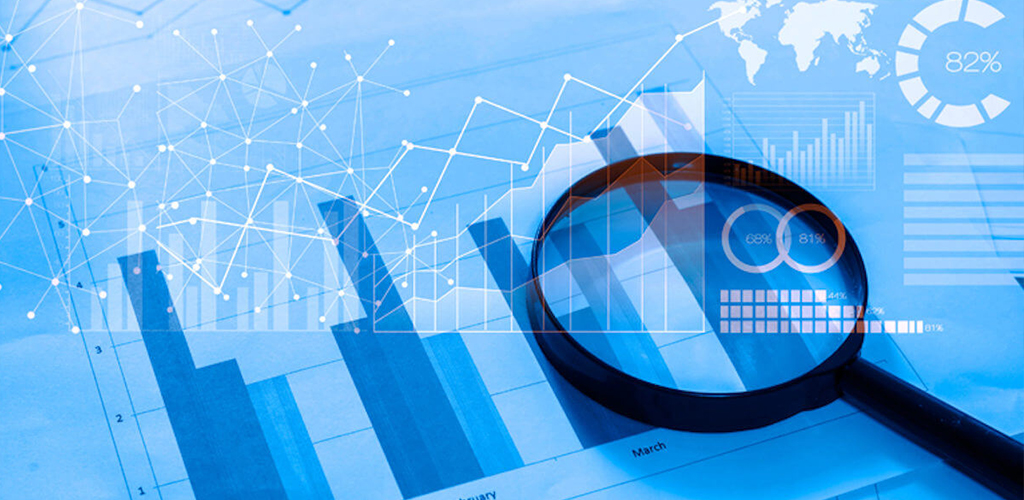

## Features Correlation

In [19]:
df_prep.corr() 

,PolicyId,ClaimId,ClaimAmount,ClaimCount,PreviousInsurerExcess,PreviousInsurerPremium,IsMemberPayer,CubicCapacity,Cyl,Kilowatts,VehicleYear,MonthsSinceInception,DaysSinceInception,SumAssured,MeanExcess,TotalExcess,ExcessTypesCount,BaseExcess,NomimatedDriversCount,NomimatedDriversUnder30Count,age
PolicyId,1.000000,0.674319,-0.042590,-0.095975,-0.014394,-0.045854,-0.024764,-0.021576,-0.046390,-0.008094,0.169925,-0.450538,-0.453100,0.065627,0.105844,0.396211,0.498567,0.134392,-0.187614,-0.106212,0.069115
ClaimId,0.674319,1.000000,-0.007204,0.027355,-0.015826,-0.042123,-0.025404,0.002193,-0.019562,-0.001576,0.096609,-0.016954,-0.021405,0.038429,0.055201,0.413176,0.611641,0.093471,-0.082379,-0.066292,0.126335
ClaimAmount,-0.042590,-0.007204,1.000000,0.553535,0.016626,0.025488,0.002995,-0.011273,-0.015999,0.008464,0.054234,0.026448,0.026788,0.058844,0.058158,0.013615,-0.041177,0.018144,-0.001243,0.011733,-0.046556
ClaimCount,-0.095975,0.027355,0.553535,1.000000,0.013259,0.028129,0.005359,-0.018159,-0.018181,0.009737,0.034545,0.158876,0.160093,0.045395,0.053107,0.054557,0.025593,-0.020909,0.023299,0.027678,-0.054099
PreviousInsurerExcess,-0.014394,-0.015826,0.016626,0.013259,1.000000,0.442726,0.026939,-0.062386,-0.054648,-0.025591,0.147769,0.011308,0.011492,0.117590,0.120901,0.081235,-0.013035,0.083602,-0.041376,-0.010484,-0.126417
PreviousInsurerPremium,-0.045854,-0.042123,0.025488,0.028129,0.442726,1.000000,0.045403,-0.054820,-0.062145,0.020394,0.241129,0.017792,0.018161,0.279245,0.169071,0.114564,-0.036698,0.002855,-0.039142,-0.016626,-0.152386
IsMemberPayer,-0.024764,-0.025404,0.002995,0.005359,0.026939,0.045403,1.000000,-0.015671,-0.007861,-0.008351,0.017148,-0.006163,-0.006256,0.014238,0.016676,-0.004235,-0.027872,0.002051,-0.077356,-0.052299,-0.072900
CubicCapacity,-0.021576,0.002193,-0.011273,-0.018159,-0.062386,-0.054820,-0.015671,1.000000,0.714084,0.765137,-0.372400,-0.007508,-0.007432,0.243099,0.042146,0.013468,-0.028300,-0.046639,0.037027,-0.020122,0.234290
Cyl,-0.046390,-0.019562,-0.015999,-0.018181,-0.054648,-0.062145,-0.007861,0.714084,1.000000,0.544440,-0.394478,-0.004858,-0.004612,0.023766,-0.079592,-0.085160,-0.041439,-0.070697,0.030240,-0.006069,0.145140
Kilowatts,-0.008094,-0.001576,0.008464,0.009737,-0.025591,0.020394,-0.008351,0.765137,0.544440,1.000000,-0.299360,0.003951,0.004323,0.451815,0.198345,0.137147,-0.017783,0.006609,0.021593,-0.026039,0.155210


<AxesSubplot:>

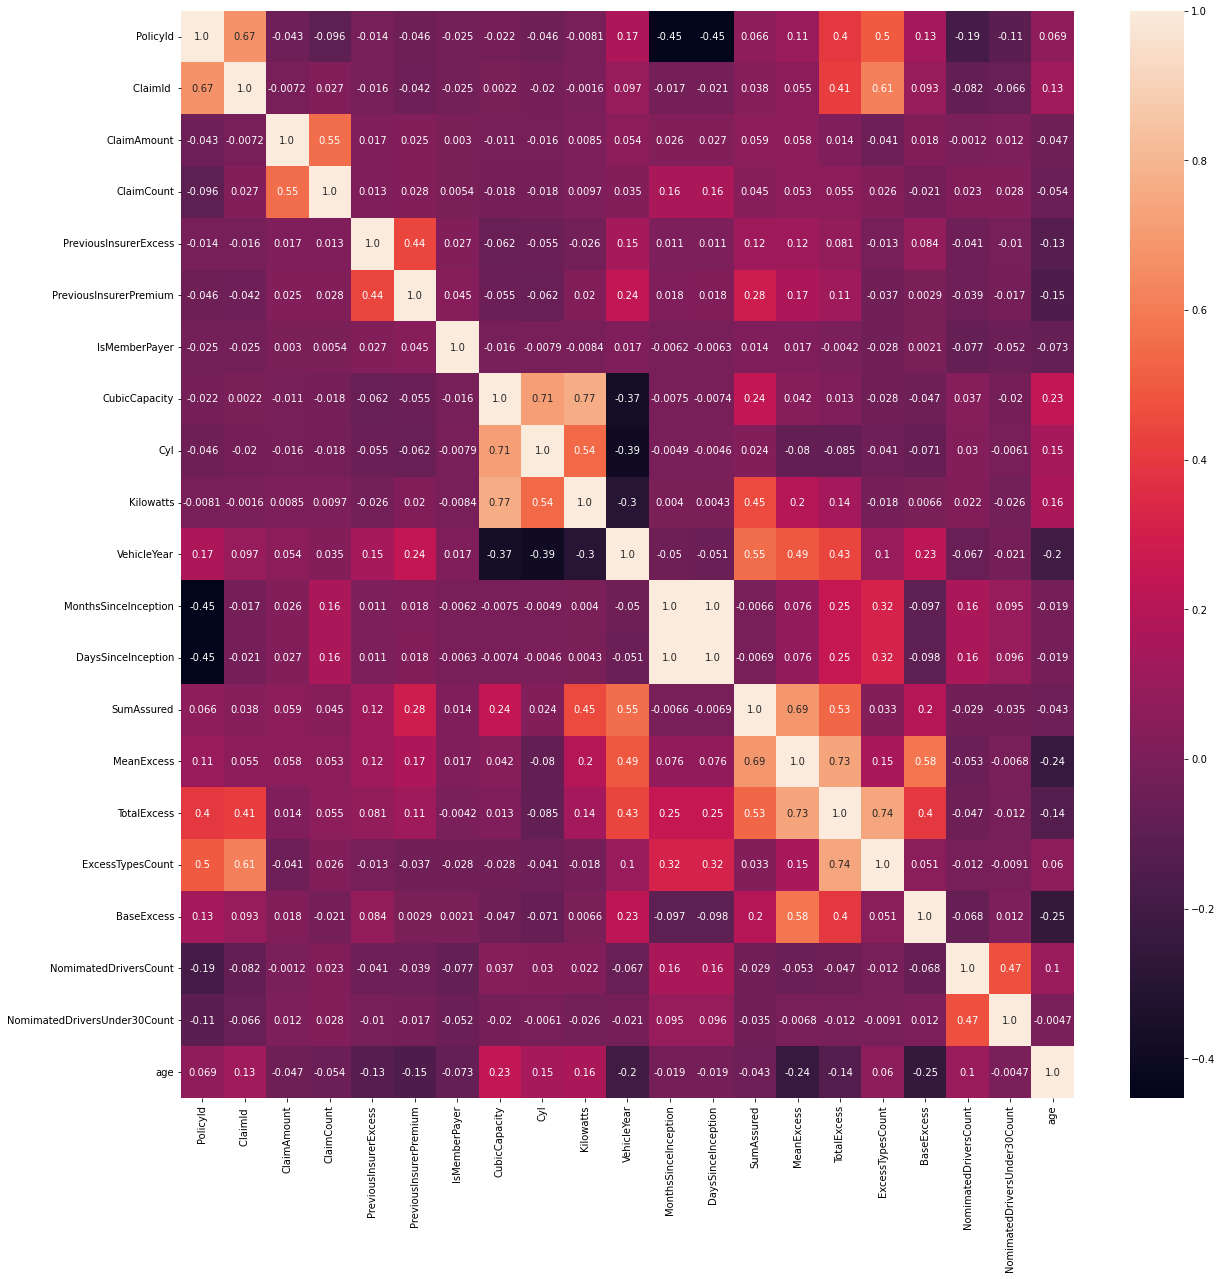

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df_prep.corr(), annot=True, fmt=".2")

# Numerical Features Distribution

From feature summary I noticed that the Standard deviation was more that the the mean, this clearly shows that it is not a normal distribution. Here is the visuals of the distribution of the numerical variables.

In [21]:
df_prep.columns

Index(['PolicyId', 'ClaimId ', 'ClaimAmount', 'ClaimCount',
       'PreviousInsurerExcess', 'PreviousInsurerPremium', 'EmploymentType',
       'IsMemberPayer', 'Employer', 'Occupation', 'IndustryType', 'Gender',
       'MaritalStatus', 'Make', 'Model', 'Colour', 'Transmission',
       'VehicleType', 'BodyType', 'CubicCapacity', 'Cyl', 'Kilowatts',
       'VehicleYear', 'PolicyMainDriverAnnualMileage',
       'PolicyMainDriverLicenseDurationRange', 'PersonProvince', 'Area',
       'MonthsSinceInception', 'DaysSinceInception', 'PolicyStatus',
       'CommencementDt', 'PolicyEndDate', 'SumAssured', 'MeanExcess',
       'TotalExcess', 'ExcessTypesCount', 'BaseExcess',
       'NomimatedDriversCount', 'NomimatedDriversUnder30Count', 'age',
       'InsuranceClaim'],
      dtype='object')

In [22]:
# Drop categorical and some irrelevant features
num_var = df_prep.drop(["InsuranceClaim", "PolicyId", "ClaimId ", "EmploymentType", "IsMemberPayer",\
                   "Employer", "Occupation", "IndustryType", "Gender", "MaritalStatus", "Make",\
                   "Model", "Colour", "Transmission", "VehicleType", "BodyType",\
                   "PolicyMainDriverLicenseDurationRange", "PersonProvince", "Area",\
                   "MonthsSinceInception", "DaysSinceInception", "PolicyStatus",\
                   "CommencementDt", "PolicyEndDate", "MeanExcess", "ExcessTypesCount",\
                   "BaseExcess", "NomimatedDriversCount", "NomimatedDriversUnder30Count", 'CubicCapacity',\
                    "PolicyMainDriverAnnualMileage"], axis=1).columns

In [23]:
num_var

Index(['ClaimAmount', 'ClaimCount', 'PreviousInsurerExcess',
       'PreviousInsurerPremium', 'Cyl', 'Kilowatts', 'VehicleYear',
       'SumAssured', 'TotalExcess', 'age'],
      dtype='object')

C:\Users\DELL\anaconda3copy\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


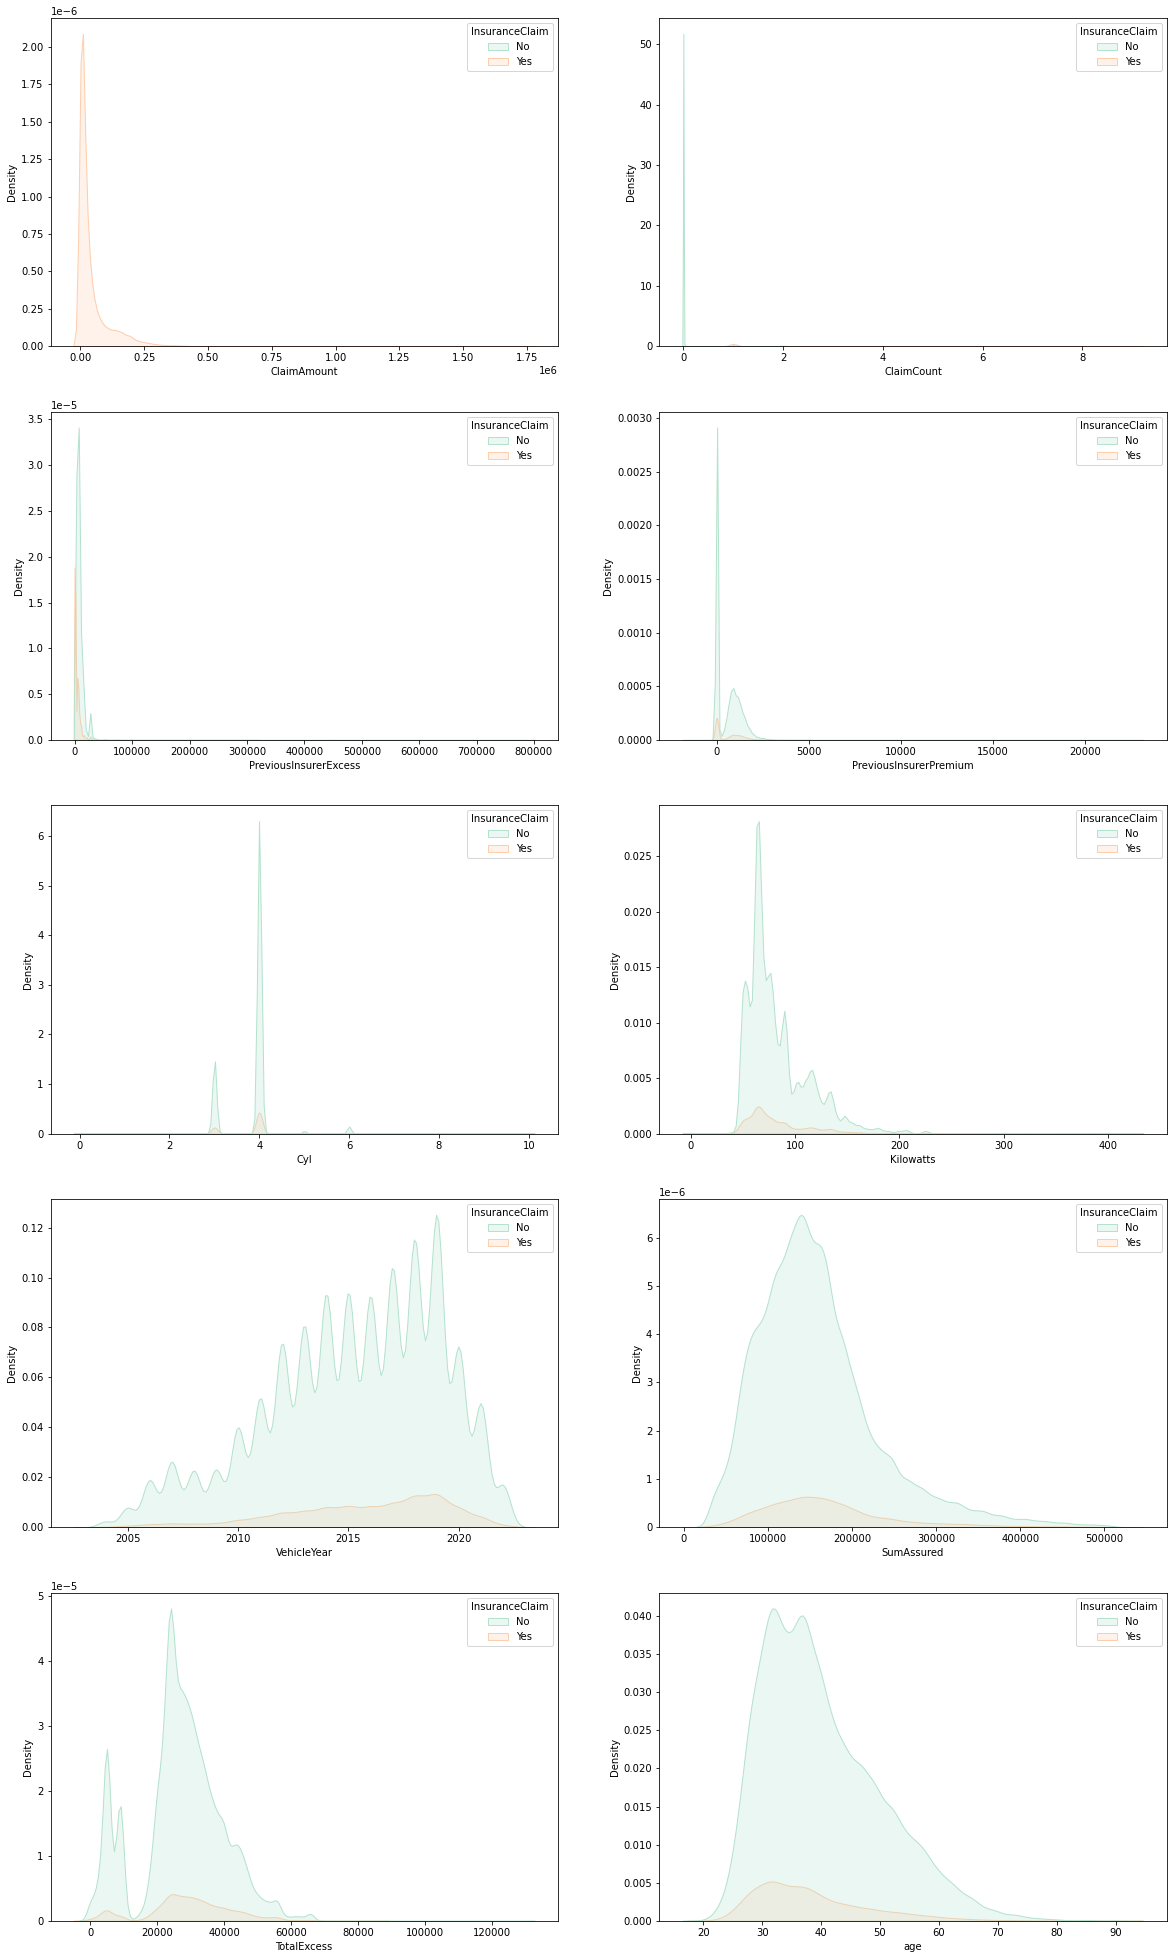

In [24]:
# plot the density distribution of numerical variables, considerings those that claimed and those that did not
fig, axes = plt.subplots(5, 2, figsize=(20,35))
for i in range(len(num_var)):
    ax = axes[int(i/2), i%2]
    sns.kdeplot(data=df_prep, x=num_var[i], hue="InsuranceClaim", fill=True, palette="Pastel2", ax=ax)

**Observations:**
* The claim amount only displays the times where there was a claim, majority of claim amount, was 0 indicating that most Policy   holders claimed nothing, displaying a Poisson distribution.
* The majority of the claim count was at 0 indicating that majority of policy holders were not claiming
* The vehicle year shows a positive distribution density, as the year increases, the density of claim amount increases too,       meaning there was either more claim amount or claim count among policy holders that claimed. until about 2019, when the count   of Zero claims increases 
* When the sum assured was between 100,000 Rands and 200,000 Rands, there was a higher density of claim amount among policy       holders that claimed.
* Among policy holders that claimed, the total excess that got the highest density of claim amount is about 25,000 Rands
* The age with the highest claim amount density is about 30 years. as policy holders grow older, the claim amount density         starts to drop
* The Kilowatts with the highest claim amount is less than 100KW, from the heu of policy holders that do not claim, I can         deduce that it is so because a lot of policy holders operated at Kilowatts less than 100KW

In [25]:
df_num_var = df_prep[['ClaimAmount', 'ClaimCount', 'PreviousInsurerExcess', 'PreviousInsurerPremium', 'Cyl',\
                      'Kilowatts', 'VehicleYear', 'SumAssured', 'TotalExcess', 'age', 'InsuranceClaim']]

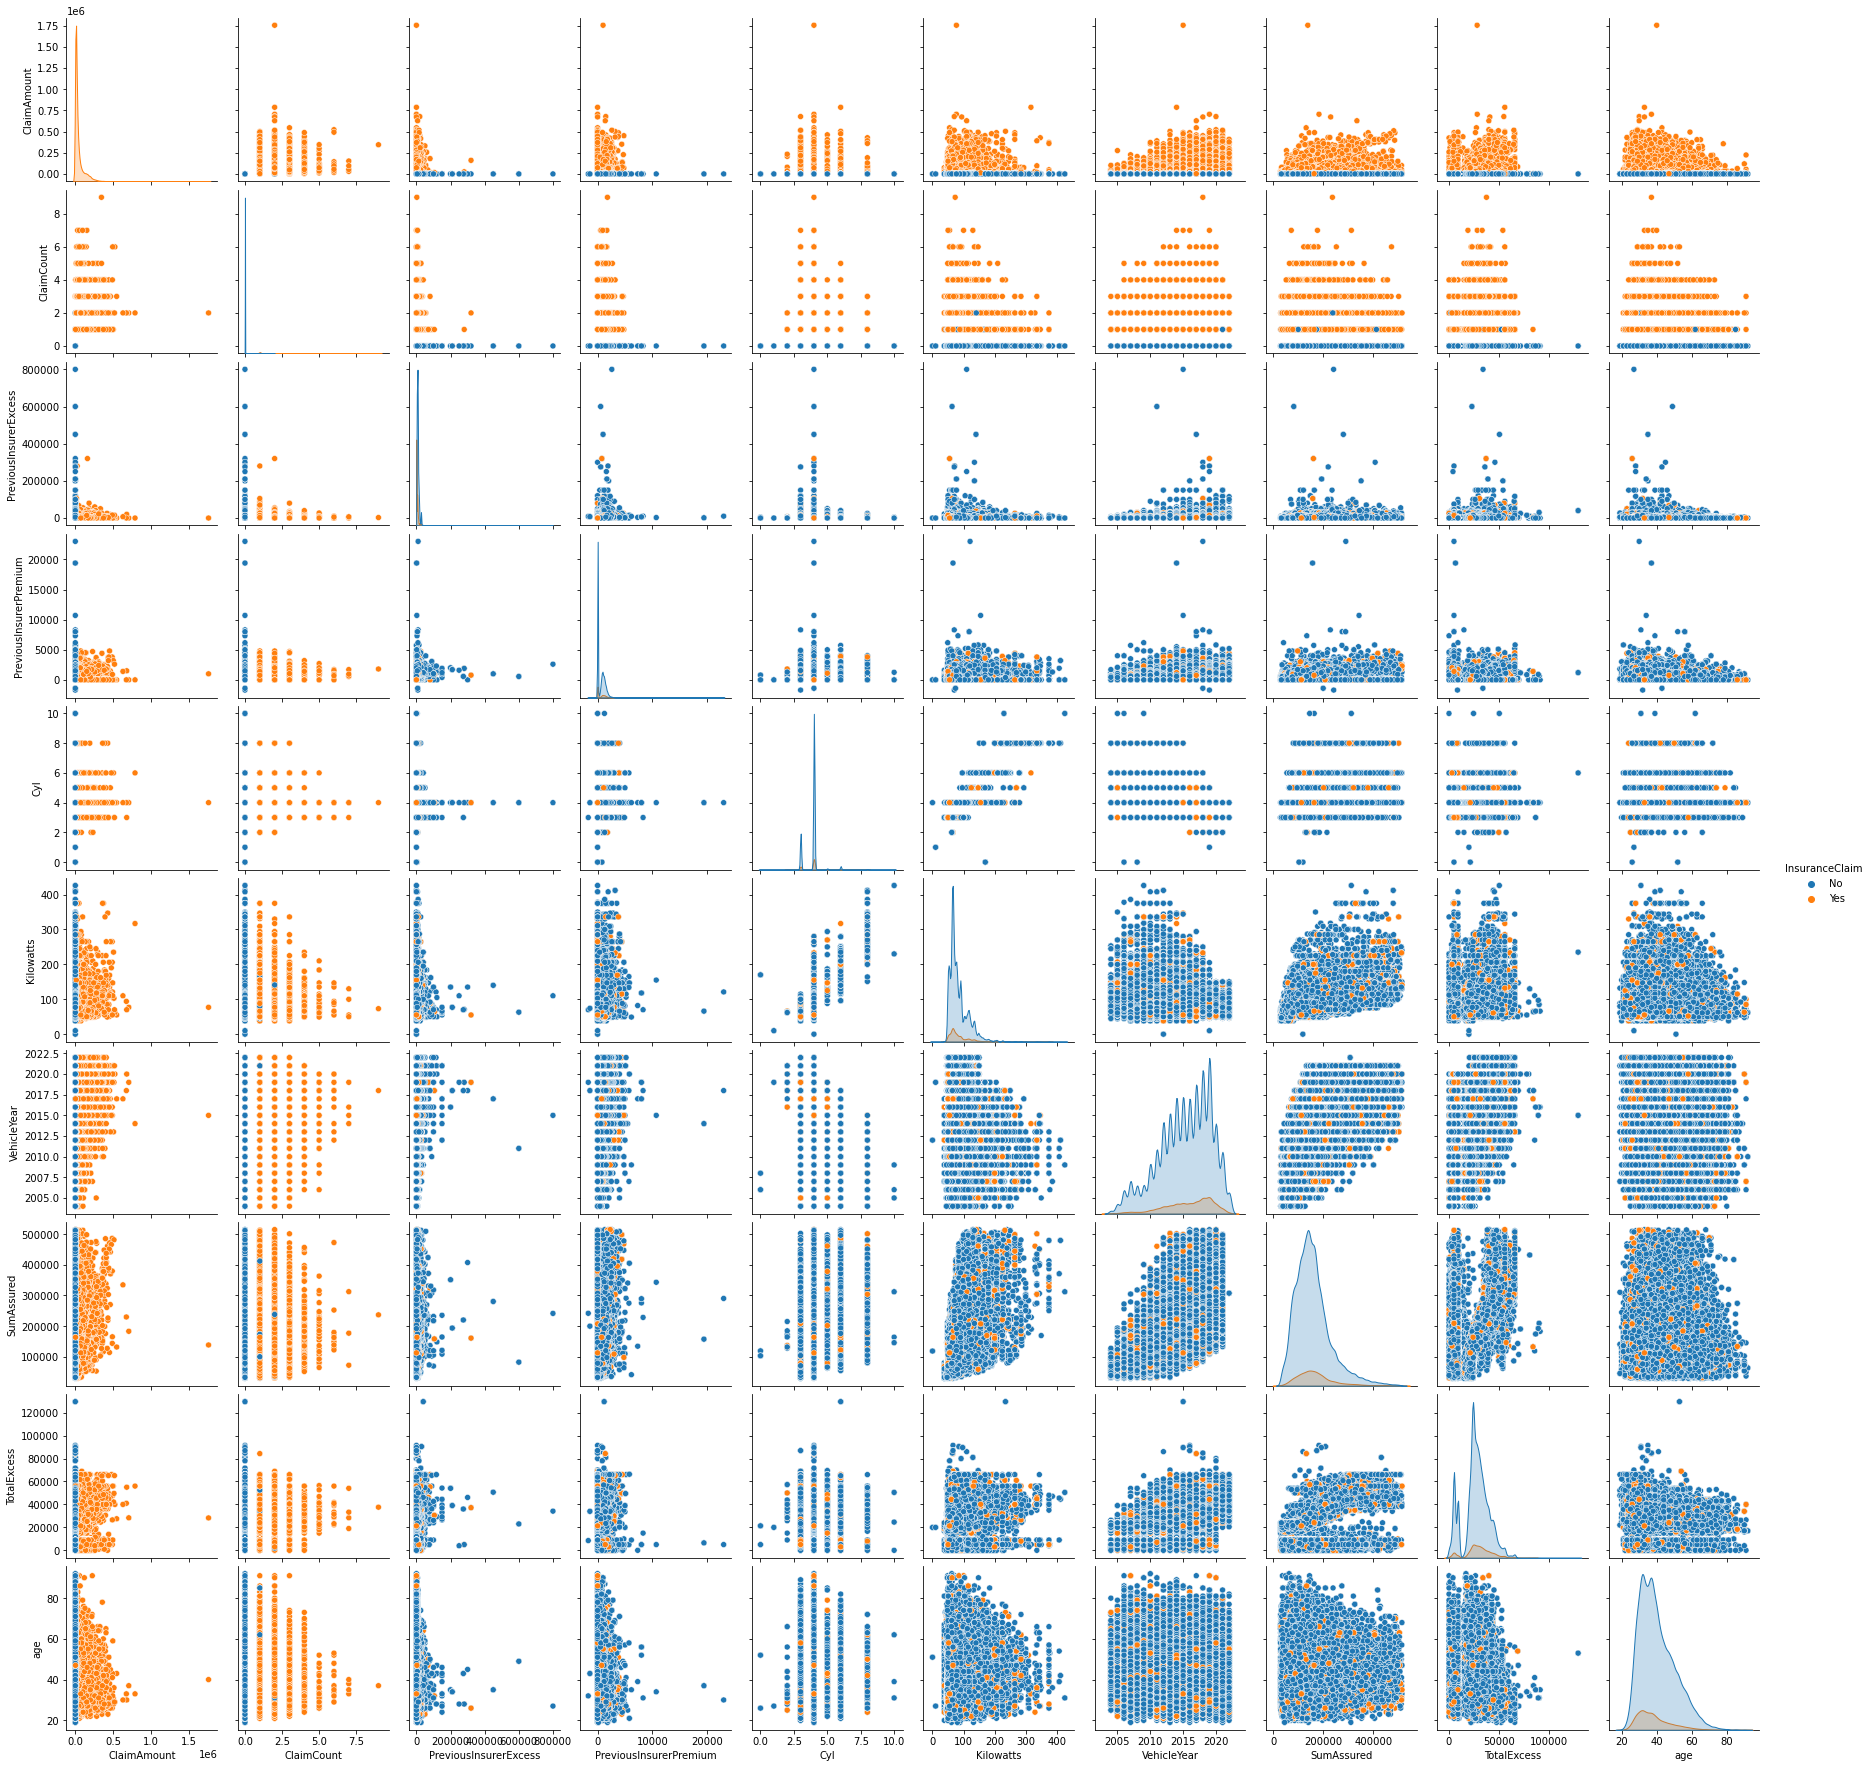

In [26]:
# For More exploration
g = sns.pairplot(df_num_var, hue = 'InsuranceClaim')
plt.show();

**Observations:**
* The majority of claim count was 0, and the hue, indicated that there was no claim
* The claim count reduces as the total excess increases. The excess with the highest claim count is about 39,000 Rands
* As the Vehicle year increases, the claim count and claim amount increases as well, the year with the highest claim count is     2017.
* The kilowatts with the highest claim amount and highest claim count is less than 100KW, and as the kilowatts increses, both     the claim amount and and claim count reduces.
* The cyl with the highest claim amount and claim count is 4
* The age with the highest claim amount and claim count is about 40 years. as policy holders grow older, the claim amount         and claim count starts to drop

# Categorical Features Distribution

Here I am interested to see how how the categorical features like gender, industry type, etc. influences the claim amount.

([<matplotlib.patches.Wedge at 0x19802475550>,
 [Text(-0.5080773468610468, 0.9756318002231373, 'Male'),
  Text(0.5080774382062859, -0.9756317526534989, 'Female')],
 [Text(-0.27713309828784366, 0.5321628001217112, '65.28%'),
  Text(0.2771331481125196, -0.5321627741746356, '34.72%')])

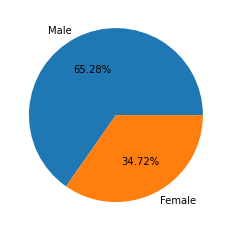

In [31]:
# Gender proportion in dataset

df["Gender"].value_counts()

Genders =  df.Gender.value_counts().index
Gender_count = df.Gender.value_counts().values

plt.pie(Gender_count, labels=Genders, autopct="%1.2f%%")

**Observations:**
* 65.3% of policy holders captured in this dataset are male while 34.7% are female

In [32]:
# List of the different employment type recorded in the dataset
df["EmploymentType"].value_counts()

Permanent             220552
Self-Employed          18943
Temporary / Casual      6889
Retired                 5770
Unemployed              4286
Part-time               3705
Commission Earner        189
Name: EmploymentType, dtype: int64

In [33]:
# List of the different employers of policy holders recorded in the dataset
df["Employer"].value_counts()

Self Employed                                             1531
DOE                                                       1381
DOH                                                        795
Unemployed                                                 622
Retired                                                    525
SAPS                                                       436
Pensioner                                                  226
SA National Defence Force                                  166
Department of Social Development                           113
ABSA                                                        96
Eskom                                                       92
Sasol                                                       89
Transnet                                                    87
Standard Bank                                               85
Anglo American                                              79
Sanlam                                                 

In [34]:
# Occupation of policy holders recorded
df["Occupation"].value_counts()

Educator                   10188
Self Employed               5840
Teacher                     4466
Nurse                       4127
Driver                      4037
                           ...  
MULTI-SKILLED OPERATOR         1
Assistant Planner              1
MANAGING DIRECTOR              1
Head Team Leader               1
Service Champion               1
Name: Occupation, Length: 27981, dtype: int64

In [35]:
# Industry types counts recorded in the dataset
df["IndustryType"].value_counts()

Other                                 124116
Government                             48685
Professional                           28914
Government Education                   20973
Office / Clerical / Manager            14566
Mining                                 11616
Medical                                 6907
Construction                            2751
Charity                                  197
Trade (e.g Electrician or Plumber)       134
Name: IndustryType, dtype: int64

In [36]:
# Marital Status counts recorded in the dataset
df["MaritalStatus"].value_counts()

Single      133594
Married     113017
Divorced     11076
Widowed       5297
Name: MaritalStatus, dtype: int64

In [37]:
# Vehicle make counts recorded in the dataset
df["Make"].value_counts()

VOLKSWAGEN    69516
TOYOTA        30850
HYUNDAI       25149
RENAULT       20927
FORD          19376
              ...  
JINBEI            1
DFM               1
ROVER             1
ZX AUTO           1
MEIYA             1
Name: Make, Length: 68, dtype: int64

In [38]:
# Provinces of policy holders recorded in the dataset
df["PersonProvince"].value_counts()

GAUTENG          107988
KWAZULU-NATAL     47491
MPUMALANGA        20007
EASTERN CAPE      19227
LIMPOPO           19193
WESTERN CAPE      17302
NORTH WEST        15914
FREE STATE        10547
NORTHERN CAPE      5315
Name: PersonProvince, dtype: int64

In [39]:
# Policy status
df["PolicyStatus"].value_counts()

Active       113661
Cancelled     71636
Lapsed        63158
Pending       14529
Name: PolicyStatus, dtype: int64

In [40]:
# Policy holders annual milage count
df["PolicyMainDriverAnnualMileage"].value_counts()

15000+ km            195509
10000 to 14999 km     26723
5000 to 9999 km       20944
<5000 km              19808
Name: PolicyMainDriverAnnualMileage, dtype: int64

## Visualizing the attributes

Here I will show visuals of how the categorical variables are related to the Claim Amount

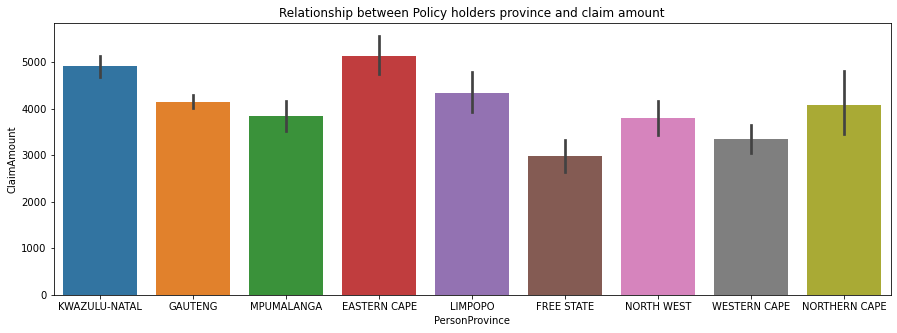

In [68]:
# Relationship between Policy holders province and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount');
plt.show();

**Observations:**
* Four provinces recorded an average greater than 4000 Rands Claim Amount recorded, with Eastern Cape being the highest           followed by Kwazulu-Natal then Limpopo and Northern Cape, respectively.

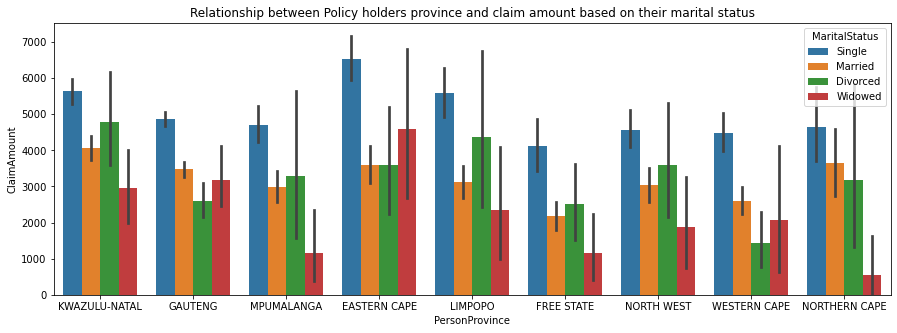

In [69]:
# Relationship between Policy holders province and claim amount based on their marital status 
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", hue = "MaritalStatus", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount based on their marital status');
plt.show();

**Observations:**
* In every provinces, Singles recorded the highest claim amount, while widowed recorded the least claim amount in all provinces   except in Guateng, Eastern Cape and Western Cape. we will neet more data to know why.

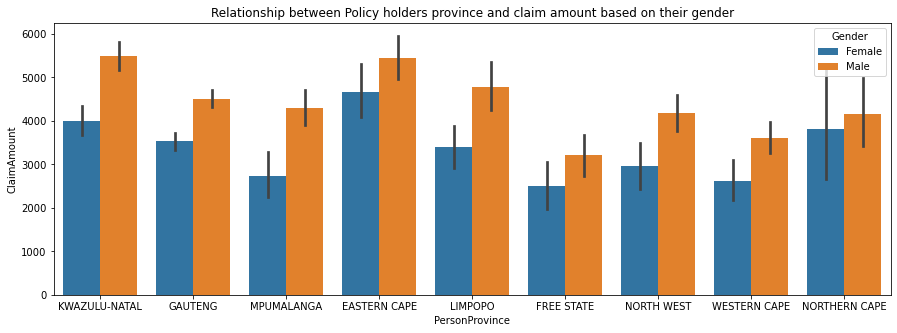

In [70]:
# Relationship between Policy holders province and claim amount based on their gender 
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", hue = "Gender", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount based on their gender');
plt.show();

**Observations:**
* Male records the highest average claim amount in every province by a good margin, because the dataset recorded more male, but   in Northern Cape, the margin between male and female average Claim amount is small

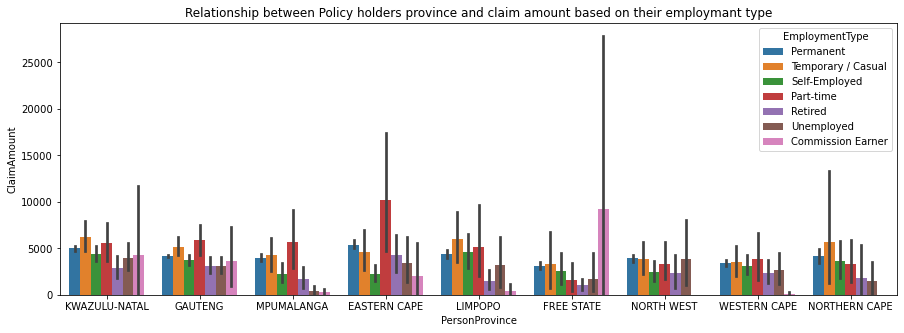

In [71]:
# Relationship between Policy holders province and claim amount based on their employmant type 
plt.figure(figsize=(15,5))
sns.barplot(x = "PersonProvince", y = "ClaimAmount", hue = "EmploymentType", data = df_prep)
plt.title('Relationship between Policy holders province and claim amount based on their employmant type');
plt.show();

**Observations:**
* Three emplyment types stood out, they are; Part-time in Eastern Cape, Commission Earners in Free State, Temporary/Casual in     Northern Cape

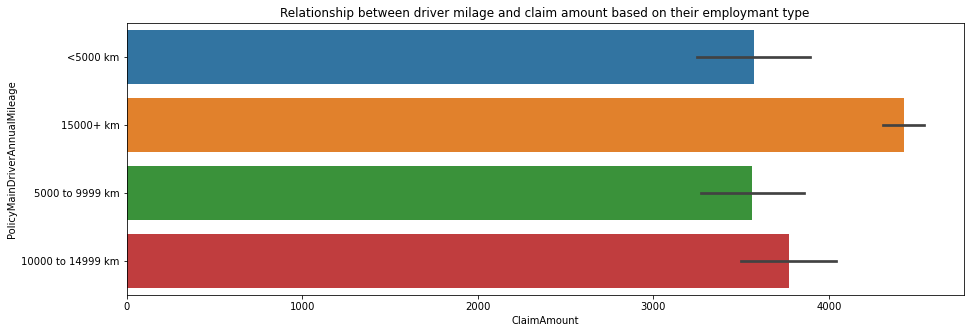

In [72]:
# Relationship between driver milage and claim amount based on their employmant type 
plt.figure(figsize=(15,5))
sns.barplot(x = "ClaimAmount", y = "PolicyMainDriverAnnualMileage", data = df_prep)
plt.title('Relationship between driver milage and claim amount based on their employmant type');
plt.show();

**Observations:**
* The data shows that the average claim amount increases with an increase in annual millage.

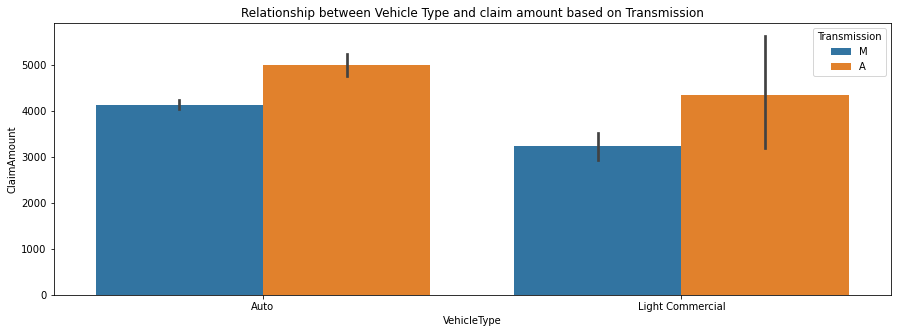

In [82]:
# Relationship between Vehicle Type and claim amount based on Transmission 
plt.figure(figsize=(15,5))
sns.barplot(x = "VehicleType", y = "ClaimAmount",  hue = "Transmission",  data = df_prep)
plt.title('Relationship between Vehicle Type and claim amount based on Transmission');
plt.show();

**Observations:**
* TAutomatic transmission recorded the highest claim amount.

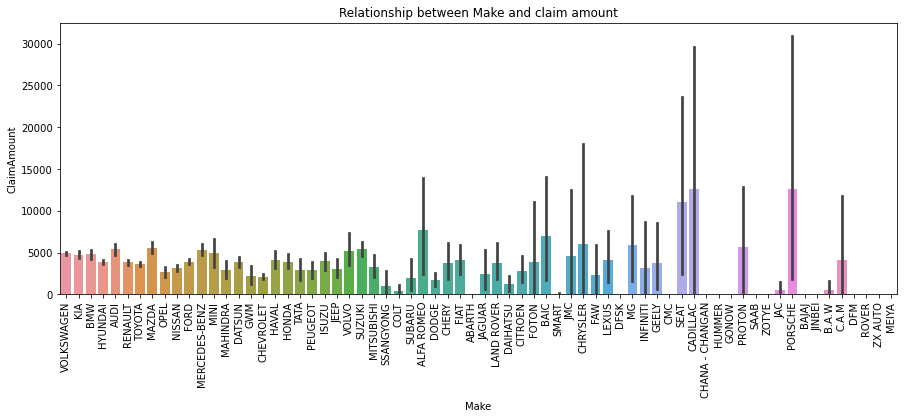

In [90]:
# Relationship between Make and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "Make", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Make and claim amount')
plt.xticks(rotation=90);
plt.show();

**Observations:**
* Cadillac, Porsche and Seat are the vehicles with the highest avaerage claim amount, despite the fact that they are not the     most car driven by policy holders recorded in the dataset

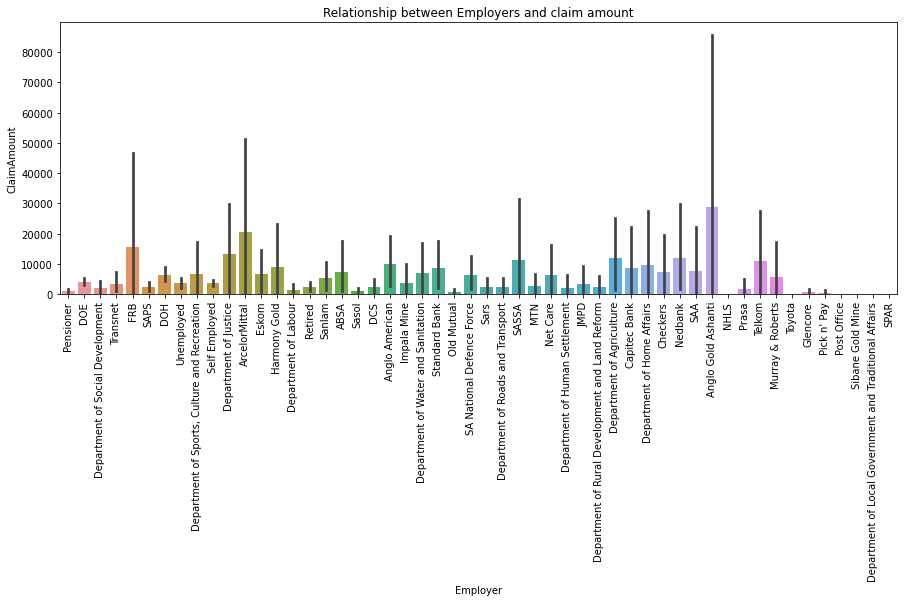

In [94]:
# Relationship between Occupation and claim amount
plt.figure(figsize=(15,5))
sns.barplot(x = "Employer", y = "ClaimAmount", data = df_prep)
plt.title('Relationship between Employers and claim amount')
plt.xticks(rotation=90);
plt.show();

**Observations:**
* Three employers withy the highest claim amount recorded are Anglo Gold Ashanti, Arcelor Mittal and FRB

# Features Engineering